In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

[*********************100%***********************]  1 of 1 completed


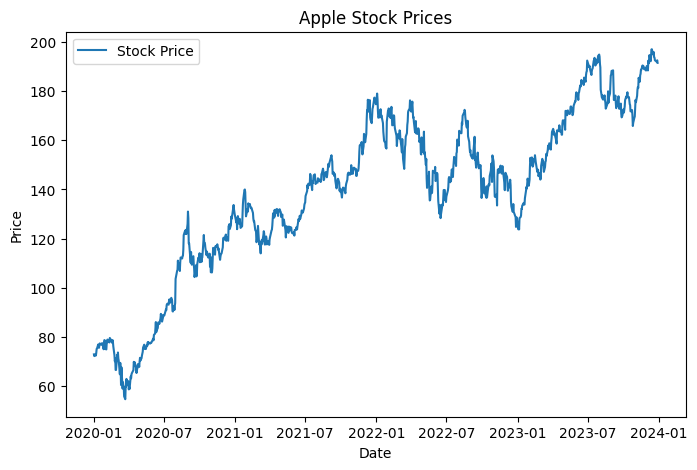

In [ ]:
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')[['Adj Close']]
plt.figure(figsize=(8, 5))
plt.plot(data, label='Stock Price')
plt.title('Apple Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30  # Use 30 days of data to predict the next day
X, y = create_sequences(scaled_data, seq_length)

In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# 3. Build the LSTM Model
'''model = Sequential([
    LSTM(50, input_shape=(seq_length, 1)),
    Dense(1)  # Single output for regression
])'''

'model = Sequential([\n    LSTM(50, input_shape=(seq_length, 1)),\n    Dense(1)  # Single output for regression\n])'

In [ ]:
# 3. Build the LSTM Model with Additional Dense Layers
model = Sequential()

# Add LSTM layer
model.add(LSTM(50, input_shape=(seq_length, 1)))

# Add the first Dense layer
model.add(Dense(32, activation='relu'))

# Add the second Dense layer
model.add(Dense(16, activation='relu'))

# Final output layer
model.add(Dense(1))  # Single unit for regression

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# 3. Build the LSTM Model with L2 Regularization
model = Sequential()
# Add LSTM layer with L2 regularization
model.add(LSTM(50, input_shape=(seq_length, 1), kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01))) # Example regularization strength: 0.01
# Add Dense layers with L2 regularization
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
# Output layer
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.1953 - val_loss: 0.0124
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0056 - val_loss: 0.0146
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0028 - val_loss: 0.0037
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012 - val_loss: 8.2894e-04
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011 - val_loss: 0.0020
Epoch 9/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0013 - val_loss: 7.4398e-04
Epoch 10/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 11/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 12/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - l

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


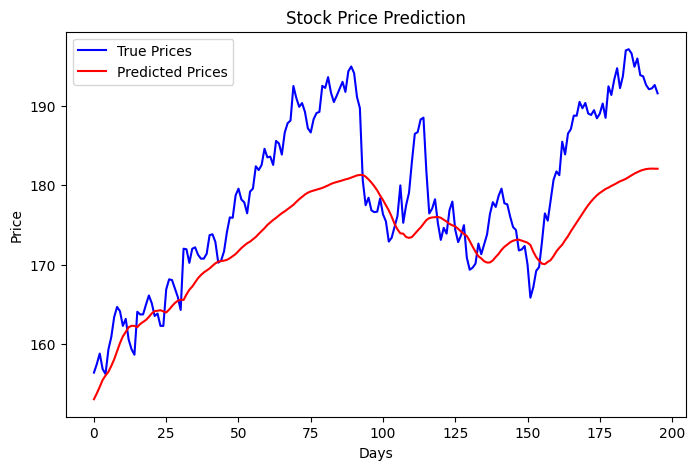

In [ ]:
# 6. Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# 7. Visualize Predictions
plt.figure(figsize=(8, 5))
plt.plot(y_test_rescaled, label='True Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 7.8583223096055175


Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (25000, 200)
x_test shape: (25000, 200)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 - 207s - 530ms/step - accuracy: 0.7702 - loss: 0.4773 - val_accuracy: 0.8314 - val_loss: 0.3888
Epoch 2/5
391/391 - 258s - 659ms/step - accuracy: 0.8541 - loss: 0.3510 - val_accuracy: 0.8578 - val_loss: 0.3436
Epoch 3/5
391/391 - 201s - 513ms/step - accuracy: 0.8825 - loss: 0.2923 - val_accuracy: 0.8480 - val_loss: 0.3661
Epoch 4/5
391/391 - 200s - 511ms/step - accuracy: 0.8952 - loss: 0.2668 - val_accuracy: 0.8561 - val_loss: 0.3568
Epoch 5/5
391/391 - 205s - 525ms/step - accuracy: 0.9116 - loss: 0.2288 - val_accuracy: 0.8494 - val_loss: 0.3865
391/391 ━━━━━━━━━━━━━━━━━━━━ 50s 128ms/step - accuracy: 0.8476 - loss: 0.3913
Test score: 0.38651007413864136
Test accuracy: 0.849399983882904


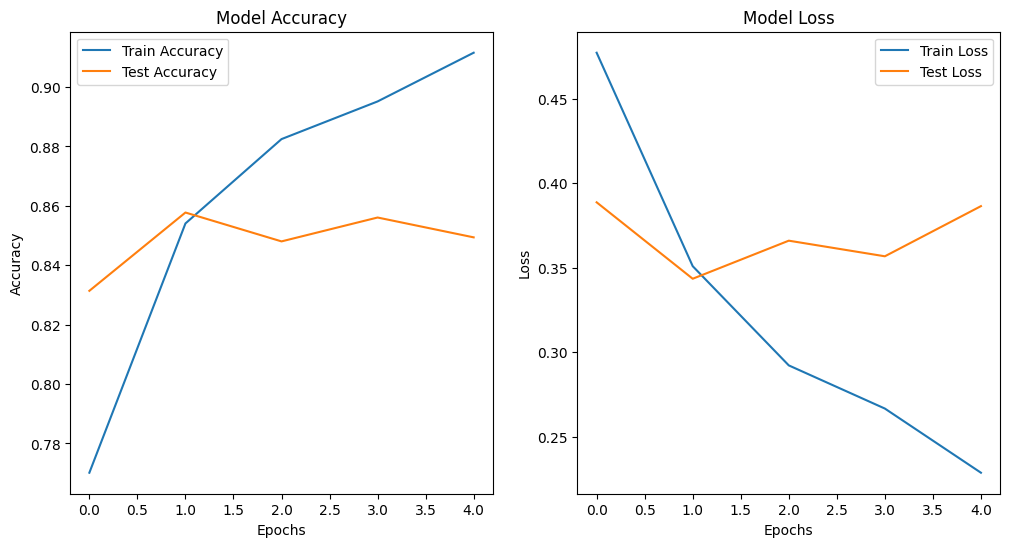

In [ ]:
#Import Libraries (additional)
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
import matplotlib.pyplot as plt
# 1. Load IMDb dataset (already preprocessed into integer sequences)
max_features = 10000 # Top 10,000 most frequent words
maxlen = 200 # Maximum number of words to consider in each review
print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
'''IMDb dataset, which contains movie reviews preprocessed into integer sequences. Each integer
represents a unique word in the dataset's vocabulary.
Limit the vocabulary size to the top 10,000 most frequent words using num_words=max_features.
Sequences are padded to a maximum length of 200 words using pad_sequences().
This ensures all input sequences are of the same length.'''
# 2. Build the LSTM model
model = Sequential()
# Embedding layer to represent words as vectors in a continuous space
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
# SpatialDropout1D helps to avoid overfitting
model.add(SpatialDropout1D(0.2))
# LSTM layer with 100 units (Build Stacked LSTM, add more layers)
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# Dense layer for output (binary classification: positive/negative)
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# 3. Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test),
verbose=2)
# 4. Evaluate the model
score, accuracy = model.evaluate(x_test, y_test, batch_size=64)
print(f"Test score: {score}")
print(f"Test accuracy: {accuracy}")
# 5. Plotting the training and validation accuracy/loss
plt.figure(figsize=(12, 6))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [ ]:
# 6. Predict on new reviews
# Test with a sample review

# Define predict_sentiment before calling it
def predict_sentiment(review):
 # Tokenize the input review
 review_seq = imdb.get_word_index()
 review = review.lower().split()
 review = [review_seq[word] if word in review_seq else 0 for word in review]
 review = pad_sequences([review], maxlen=maxlen)
 # Predict sentiment (0: negative, 1: positive)
 prediction = model.predict(review)
 return "Positive" if prediction >= 0.5 else "Negative"

sample_review = "I hate this movie!"
print(f"Review: {sample_review}\nPrediction: {predict_sentiment(sample_review)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Review: I hate this movie!
Prediction: Negative
